# 凝聚式聚類

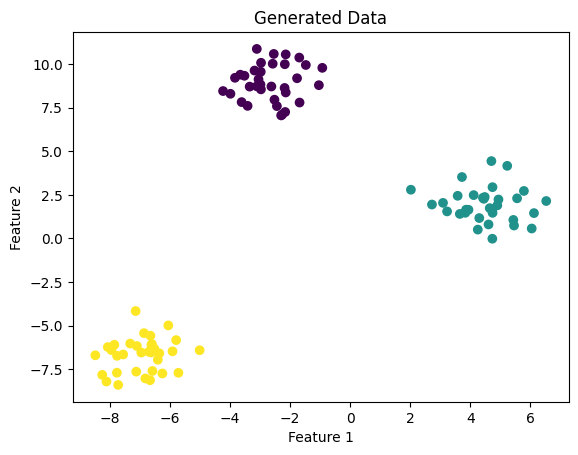

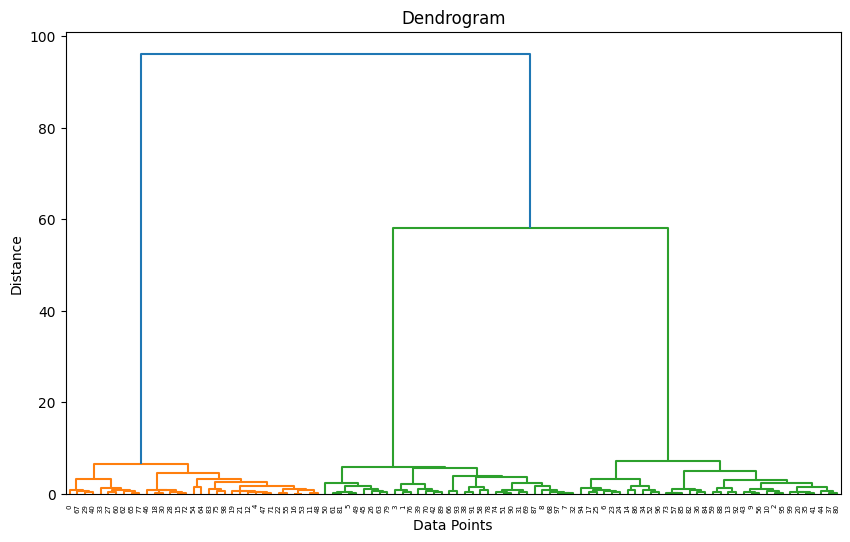

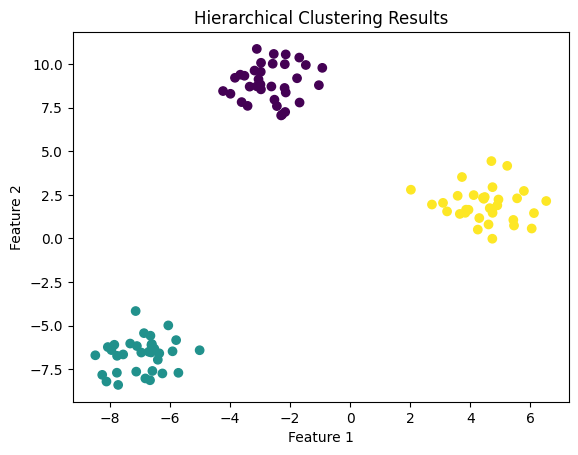

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 生成模擬資料
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# 可視化資料
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 使用Scipy的linkage方法進行凝聚式階層聚類（Agglomerative）
Z = linkage(X, method='ward')

# 繪製樹狀圖
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# 使用sklearn的AgglomerativeClustering進行聚類
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_pred = agg_clustering.fit_predict(X)

# 可視化聚類結果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 分割式聚類

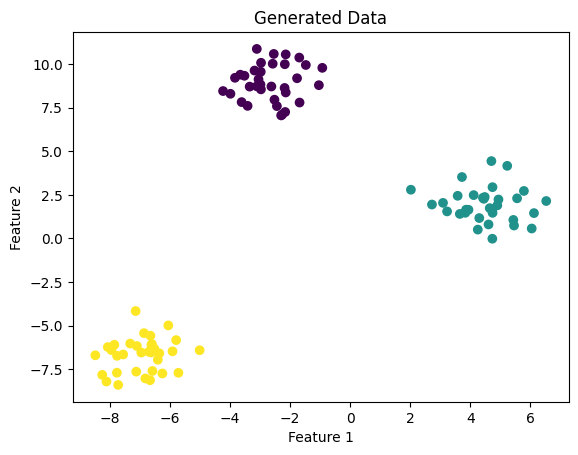

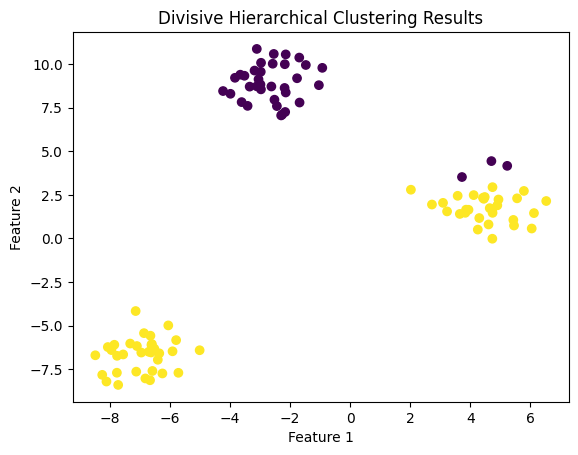

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成模擬資料
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# 可視化資料
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 分割式聚類的實現
def divisive_hierarchical_clustering(X, n_clusters):
    # 初始群組是整個資料集
    clusters = [X]
    all_labels = np.zeros(X.shape[0], dtype=int)

    current_label = 0  # 用來區分不同的群組

    # 重複進行分割直到群組數量達到n_clusters
    while len(clusters) < n_clusters:
        # 選擇最大群組進行分割
        largest_cluster = max(clusters, key=len)

        # 使用KMeans將該群組分割成2個子群組
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(largest_cluster)

        # 根據KMeans的預測結果將資料分割成兩個子群組
        cluster_1_indices = np.where(kmeans.labels_ == 0)[0]
        cluster_2_indices = np.where(kmeans.labels_ == 1)[0]

        # 將新的兩個子群組加入到群組中
        clusters.append(largest_cluster[cluster_1_indices])
        clusters.append(largest_cluster[cluster_2_indices])

        # 更新標籤
        all_labels[cluster_1_indices] = current_label
        all_labels[cluster_2_indices] = current_label + 1

        # 更新標籤
        current_label += 2

        # 移除已經分割的群組。直接從 `clusters` 列表中移除最大群組
        # 注意：這裡不再直接移除，而是忽略掉分割過的群組
        clusters = [c for c in clusters if len(c) > 0]

    return all_labels

# 使用分割式聚類
n_clusters = 3
y_pred_divisive = divisive_hierarchical_clustering(X, n_clusters)

# 可視化分割式聚類結果
plt.scatter(X[:, 0], X[:, 1], c=y_pred_divisive, cmap='viridis')
plt.title('Divisive Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
